In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ../..

In [3]:
from src.conrl import ConRL
from src.qlearning import QLearningAgent
from src.sarsalambda import SarsaLambdaAgent
from src.utils import *

import itertools
import time
import numpy as np
import pandas as pd
import gym
import time
import sys
import copy
from collections import namedtuple

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.collections as mc

%matplotlib inline
plt.style.use('seaborn-paper')
np.set_printoptions(precision=3, linewidth=80)

## Q-Learning

In [4]:
state_size = (10, 10)
env = DiscretizationWrapper(gym.make('MountainCar-v0'), state_size)

num_episodes = 500
max_step = 1000
env.env._max_episode_steps = max_step

q_params = {
    "gamma": 0.9,
    "alpha": 0.1,
    "alpha_decay_rate": 0,
    "min_alpha": 0.1,
    "epsilon": 0.9,
    "epsilon_decay_rate": 0,
    "min_epsilon": 0.01
}

q_params["epsilon_decay_rate"] = (q_params["epsilon"] - q_params["min_epsilon"])/(num_episodes//2)
q_params["alpha_decay_rate"] = (q_params["alpha"] - q_params["min_alpha"])/(num_episodes//2)



In [5]:
stats_q =   {
            "step":  np.zeros(num_episodes),
            "cumulative_reward":  np.zeros(num_episodes),
            "q_tables": np.zeros(shape = (num_episodes, ) + state_size + (env.action_space.n, )),
            "best_actions": []
            }

q_agent = QLearningAgent(action_size=env.action_space.n, state_size=state_size, **q_params)

q_agent.train(env, num_episodes, stats_q)

Episode 50/500, Reward -1000.0, Average Max Reward: -956.0, Total steps 1000.0, Epsilon: 0.72, Alpha: 0.10, Time 0.096
Episode 100/500, Reward -523.0, Average Max Reward: -876.4, Total steps 523.0, Epsilon: 0.54, Alpha: 0.10, Time 0.053
Episode 150/500, Reward -382.0, Average Max Reward: -717.5, Total steps 382.0, Epsilon: 0.37, Alpha: 0.10, Time 0.040
Episode 200/500, Reward -267.0, Average Max Reward: -214.2, Total steps 267.0, Epsilon: 0.19, Alpha: 0.10, Time 0.026
Episode 250/500, Reward -522.0, Average Max Reward: -333.0, Total steps 522.0, Epsilon: 0.01, Alpha: 0.10, Time 0.058
Episode 300/500, Reward -205.0, Average Max Reward: -278.0, Total steps 205.0, Epsilon: 0.01, Alpha: 0.10, Time 0.030
Episode 350/500, Reward -1000.0, Average Max Reward: -889.9, Total steps 1000.0, Epsilon: 0.01, Alpha: 0.10, Time 0.098
Episode 400/500, Reward -354.0, Average Max Reward: -237.3, Total steps 354.0, Epsilon: 0.01, Alpha: 0.10, Time 0.042
Episode 450/500, Reward -171.0, Average Max Reward: -

In [27]:
def time_q():
    q_agent = QLearningAgent(action_size=env.action_space.n, state_size=state_size, **q_params)
    q_agent.train(env, num_episodes, stats_q)
    
%timeit time_q()

Episode 50/500, Reward -1000.0, Average Max Reward: -952.3, Total steps 1000.0, Epsilon: 0.74, Alpha: 0.10, Time 0.107
Episode 100/500, Reward -612.0, Average Max Reward: -929.0, Total steps 612.0, Epsilon: 0.58, Alpha: 0.10, Time 0.066
Episode 150/500, Reward -462.0, Average Max Reward: -482.4, Total steps 462.0, Epsilon: 0.42, Alpha: 0.10, Time 0.050
Episode 200/500, Reward -424.0, Average Max Reward: -358.5, Total steps 424.0, Epsilon: 0.26, Alpha: 0.10, Time 0.044
Episode 250/500, Reward -1000.0, Average Max Reward: -525.2, Total steps 1000.0, Epsilon: 0.10, Alpha: 0.10, Time 0.112
Episode 300/500, Reward -220.0, Average Max Reward: -235.8, Total steps 220.0, Epsilon: 0.10, Alpha: 0.10, Time 0.024
Episode 350/500, Reward -312.0, Average Max Reward: -319.5, Total steps 312.0, Epsilon: 0.10, Alpha: 0.10, Time 0.035
Episode 400/500, Reward -232.0, Average Max Reward: -309.2, Total steps 232.0, Epsilon: 0.10, Alpha: 0.10, Time 0.025
Episode 450/500, Reward -182.0, Average Max Reward: -

Episode 450/500, Reward -185.0, Average Max Reward: -184.8, Total steps 185.0, Epsilon: 0.10, Alpha: 0.10, Time 0.021
Episode 500/500, Reward -219.0, Average Max Reward: -310.6, Total steps 219.0, Epsilon: 0.10, Alpha: 0.10, Time 0.027
#### Finished training in : 31.102
Episode 50/500, Reward -513.0, Average Max Reward: -917.9, Total steps 513.0, Epsilon: 0.74, Alpha: 0.10, Time 0.067
Episode 100/500, Reward -808.0, Average Max Reward: -884.2, Total steps 808.0, Epsilon: 0.58, Alpha: 0.10, Time 0.091
Episode 150/500, Reward -976.0, Average Max Reward: -547.9, Total steps 976.0, Epsilon: 0.42, Alpha: 0.10, Time 0.111
Episode 200/500, Reward -242.0, Average Max Reward: -468.9, Total steps 242.0, Epsilon: 0.26, Alpha: 0.10, Time 0.029
Episode 250/500, Reward -148.0, Average Max Reward: -223.3, Total steps 148.0, Epsilon: 0.10, Alpha: 0.10, Time 0.018
Episode 300/500, Reward -150.0, Average Max Reward: -735.2, Total steps 150.0, Epsilon: 0.10, Alpha: 0.10, Time 0.019
Episode 350/500, Rewar

## Con-RL

In [6]:
state_size = (10, 10)
env = DiscretizationWrapper(gym.make('MountainCar-v0'), state_size)

num_episodes = 500
max_step = 1000
env.env._max_episode_steps = max_step
env.spec.max_episode_steps = max_step

q_params = {
    "gamma": 0.9,
    "alpha": 0.1,
    "alpha_decay_rate": 0,
    "min_alpha": 0.1,
    "epsilon": 0.9,
    "epsilon_decay_rate": 0,
    "min_epsilon": 0.01
}

q_params["epsilon_decay_rate"] = (q_params["epsilon"] - q_params["min_epsilon"])/(num_episodes//2)
q_params["alpha_decay_rate"] = (q_params["alpha"] - q_params["min_alpha"])/(num_episodes//2)

mlgng_params = {
    "ndim": 2, 
    "e_w":0.05, 
    "e_n":0.005, 
    "l":10, 
    "a":0.5, 
    "b":0.95,
    "k":1000.0, 
    "max_nodes": 5, 
    "max_age": 200
}

In [30]:
stats_cr = build_conrl_stats(num_episodes, env)

conrl = ConRL(action_size=env.action_space.n, state_size=state_size, update_threshold=10)
support = QLearningAgent(action_size=env.action_space.n, state_size=state_size, **q_params)
conrl.init_support(support)
conrl.init_mlgng(**mlgng_params)

conrl.train(env, num_episodes, stats_cr)

#### Starting training #####
Episode 50/500, Average Reward: -795.62, Global Error: 11.88, Total steps 258.0, Discount: 0.48, Time 0.253
	 MLGNG nodes per action layer: 1 2 2
Episode 100/500, Average Reward: -141.54, Global Error: 140.39, Total steps 188.0, Discount: 0.23, Time 0.043
	 MLGNG nodes per action layer: 5 3 4
Episode 150/500, Average Reward: -165.32, Global Error: 107.70, Total steps 164.0, Discount: 0.11, Time 0.010
	 MLGNG nodes per action layer: 5 5 5
Episode 200/500, Average Reward: -147.98, Global Error: 125.81, Total steps 118.0, Discount: 0.05, Time 0.010
	 MLGNG nodes per action layer: 5 5 5
Episode 250/500, Average Reward: -146.84, Global Error: 119.56, Total steps 163.0, Discount: 0.02, Time 0.012
	 MLGNG nodes per action layer: 5 5 4
Episode 300/500, Average Reward: -150.32, Global Error: 93.54, Total steps 146.0, Discount: 0.01, Time 0.010
	 MLGNG nodes per action layer: 5 5 5
Episode 350/500, Average Reward: -151.44, Global Error: 85.64, Total steps 158.0, Disc

## Statistics

In [31]:
from src.plotting import *

act_dict = {
    0: "Push left",
    1: "No push",
    2: "Push right"
}

act_symbol = {
    0:  "o",
    1: "^",
    2: "s",
}
act_color = cm.Dark2(np.linspace(0.1, 1, 3, endpoint=False))


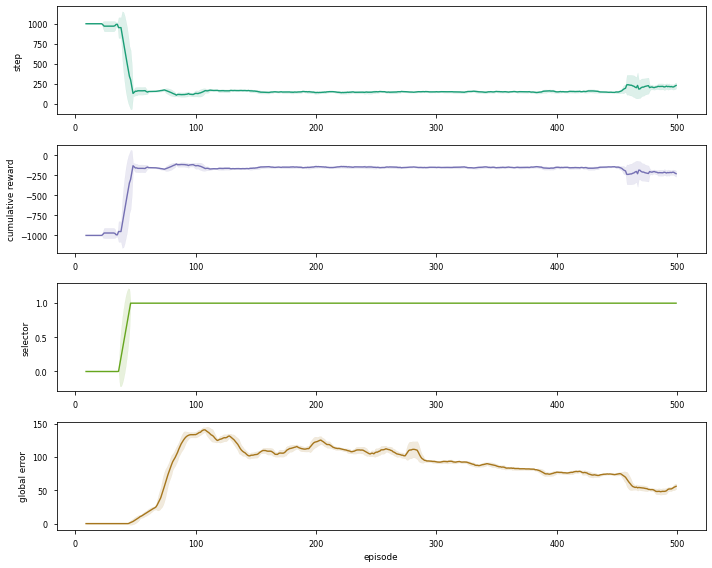

In [32]:
to_plot = ["step", "cumulative_reward", "global_error", "selector"]

stats_to_plot = {key: value for key, value in stats_cr.items() if key in to_plot}
stats_to_plot["global_error"] = stats_to_plot["global_error"].sum(axis=1)
plot_stats(stats_to_plot, figsize=(10, 8))

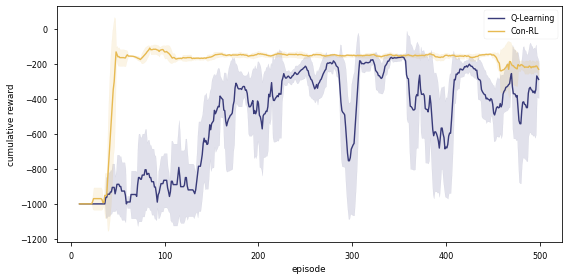

In [33]:
to_plot = ["cumulative_reward"]
plot_stats_comparison({
    "Q-Learning": {key: value for key, value in stats_q.items() if key in to_plot}, 
    "Con-RL": {key: value for key, value in stats_cr.items() if key in to_plot}
},
title="",
rolling_window=10,
subplots=len(to_plot),
figsize=(8, 4))

In [34]:
tmp = stats_cr["mlgng_nodes"][80].copy()
# tmp[0:2, tmp[2]==0]+= [[0.5], [-0.5]]
# tmp[0:2, tmp[2]==2]+=[[-0.5], [0.5]]

# tmp[0:2, tmp[2]==0]+= np.random.normal(0, 0.3, size=tmp[0:2, tmp[2]==0].shape)
# tmp[0:2, tmp[2]==2]+= np.random.normal(0, 0.3, size=tmp[0:2, tmp[2]==2].shape)


In [35]:
nodes=np.array(
[
    [1, 3, 8, 3, 7, 9, 6, 8, 4, 3, 5, 2],
    [1, 2, 7, 4, 3, 3, 5, 5, 4, 6, 4, 9],
    [0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2]
])

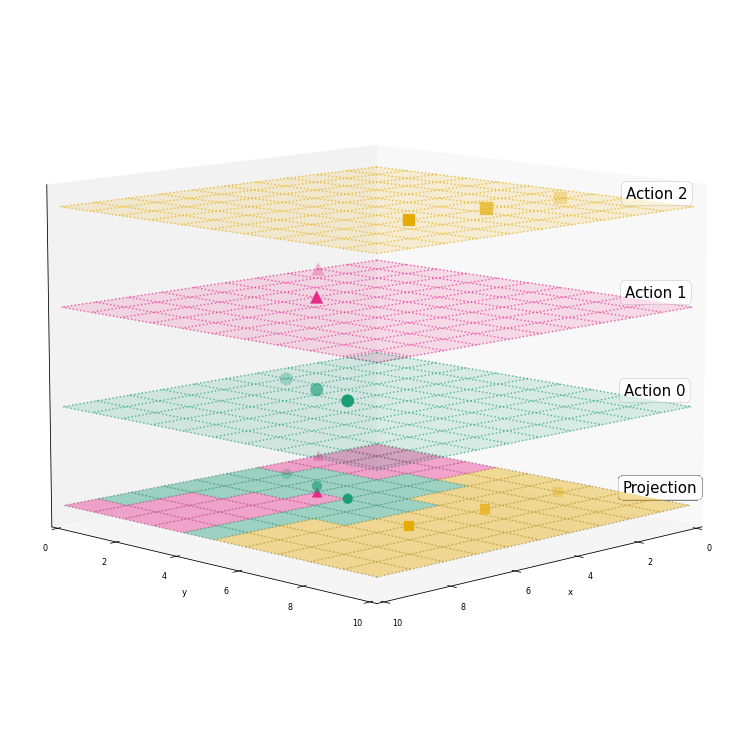

In [36]:
plot_nodes_3d(
            nodes=stats_cr["mlgng_nodes"][80],
            title="",
            policy=stats_cr["best_actions"][80],
            state_size=state_size, 
            action_names=act_dict, 
            symbols=act_symbol, 
            colors=act_color,
            axis_names=["x", "y", "action"])

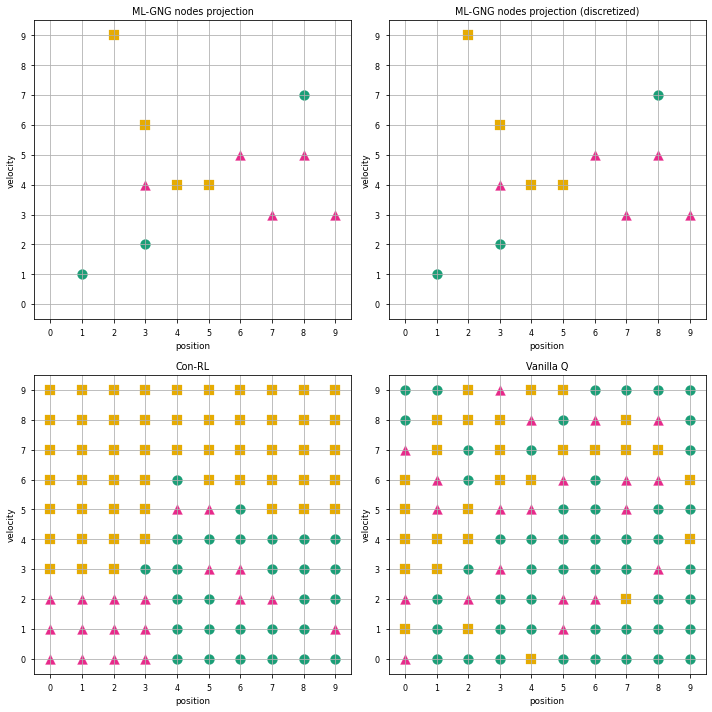

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax = ax.flatten()

project_nodes(nodes=nodes, 
            state_size=state_size, 
            action_names=act_dict, 
            symbols=act_symbol, 
            colors=act_color,
            axis_names=["position", "velocity"],
            title="ML-GNG nodes projection",
            round=False,
            def_plot=(fig, ax[0]))

project_nodes(nodes=nodes, 
            state_size=state_size, 
            action_names=act_dict, 
            symbols=act_symbol, 
            colors=act_color,
            axis_names=["position", "velocity"],
            title="ML-GNG nodes projection (discretized)",
            round=True,
            def_plot=(fig, ax[1]),)

project_nodes(nodes=conrl.get_best_actions(), 
            state_size=state_size, 
            action_names=act_dict, 
            symbols=act_symbol, 
            colors=act_color,
            axis_names=["position", "velocity"],
            title="Con-RL",
            def_plot=(fig, ax[2]))

project_nodes(nodes=q_agent.get_best_actions(), 
            state_size=state_size, 
            action_names=act_dict, 
            symbols=act_symbol, 
            colors=act_color,
            axis_names=["position", "velocity"],
            title="Vanilla Q",
            def_plot=(fig, ax[3]))

fig.tight_layout()

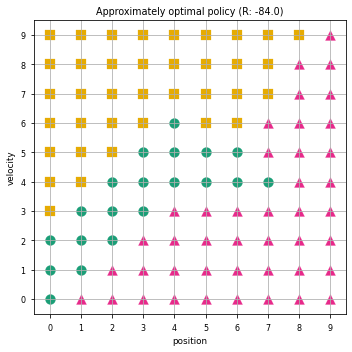

In [38]:
project_nodes(nodes=stats_cr["best_actions"][np.argmax(stats_cr["cumulative_reward"])], 
            state_size=state_size, 
            action_names=act_dict, 
            symbols=act_symbol, 
            colors=act_color,
            axis_names=["position", "velocity"],
            title="Approximately optimal policy (R: {})".format(stats_cr["cumulative_reward"][np.argmax(stats_cr["cumulative_reward"])]),
            figsize=(5, 5),
            round=True,)

In [39]:
tmp = stats_cr["mlgng_nodes"][70].copy()
tmp[0:2, tmp[2]==0]+= [[0.4], [-0.4]]
tmp[0:2, tmp[2]==2]+=[[-0.4], [0.4]]

tmp[0:2, tmp[2]==0]+= np.random.normal(0, 0.3, size=tmp[0:2, tmp[2]==0].shape)
tmp[0:2, tmp[2]==2]+= np.random.normal(0, 0.3, size=tmp[0:2, tmp[2]==2].shape)


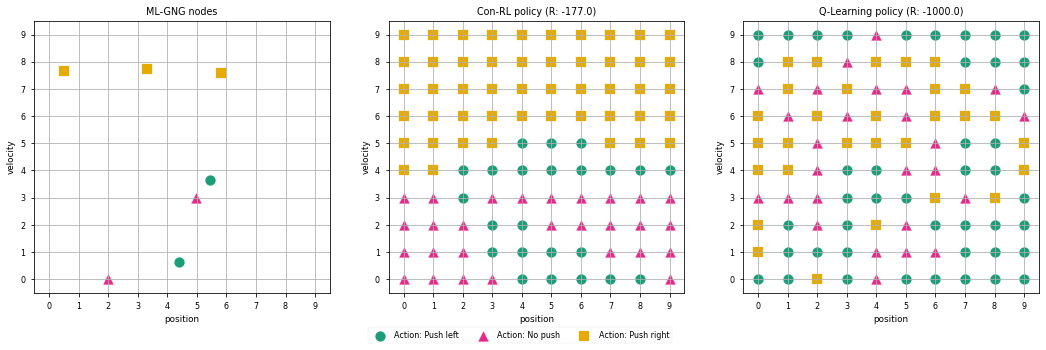

In [40]:

fig, ax = plt.subplots(ncols=3, figsize=(18, 5))
ax = ax.flatten()

ep = 70
#fig.suptitle("Stats@{}th episode - Reward Con-RL: {} | Vanilla Q: {}".format(ep, stats_cr["cumulative_reward"][ep], stats_q["cumulative_reward"][ep]))
project_nodes(nodes=tmp, 
            state_size=state_size, 
            action_names=act_dict, 
            symbols=act_symbol, 
            colors=act_color,
            axis_names=["position", "velocity"],
            title="ML-GNG nodes",
            round=False,
            def_plot=(fig, ax[0]))

project_nodes(nodes=stats_cr["best_actions"][ep], 
            state_size=state_size, 
            action_names=act_dict, 
            symbols=act_symbol, 
            colors=act_color,
            axis_names=["position", "velocity"],
            title="Con-RL policy (R: {})".format(stats_cr["cumulative_reward"][ep]),
            round=True,
            def_plot=(fig, ax[1]))

project_nodes(nodes=stats_q["best_actions"][ep], 
            state_size=state_size, 
            action_names=act_dict, 
            symbols=act_symbol, 
            colors=act_color,
            axis_names=["position", "velocity"],
            title="Q-Learning policy (R: {})".format(stats_q["cumulative_reward"][ep]),
            round=True,
            labels=True,
            def_plot=(fig, ax[2]),
            legend=False)
fig.legend(bbox_to_anchor=(0.5, 0.04), loc='upper center', ncol=3)

No handles with labels found to put in legend.


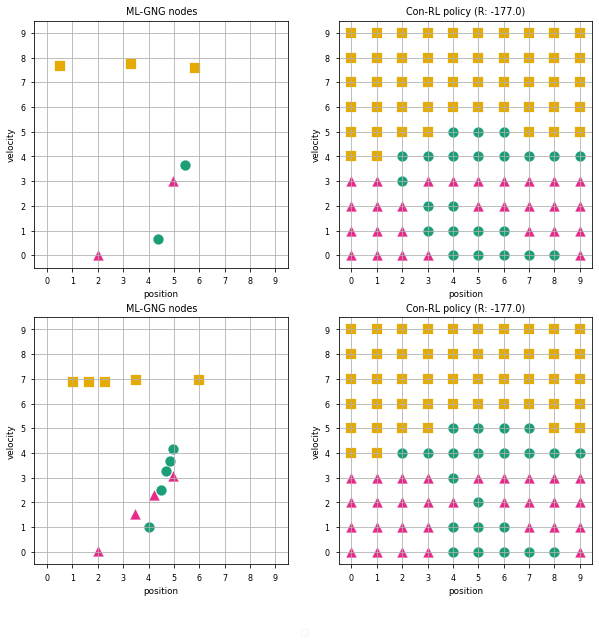

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax = ax.flatten()

ep = 70
#fig.suptitle("Stats@{}th episode - Reward Con-RL: {} | Vanilla Q: {}".format(ep, stats_cr["cumulative_reward"][ep], stats_q["cumulative_reward"][ep]))
project_nodes(nodes=tmp, 
            state_size=state_size, 
            action_names=act_dict, 
            symbols=act_symbol, 
            colors=act_color,
            axis_names=["position", "velocity"],
            title="ML-GNG nodes",
            round=False,
            def_plot=(fig, ax[0]))

project_nodes(nodes=stats_cr["best_actions"][ep], 
            state_size=state_size, 
            action_names=act_dict, 
            symbols=act_symbol, 
            colors=act_color,
            axis_names=["position", "velocity"],
            title="Con-RL policy (R: {})".format(stats_cr["cumulative_reward"][ep]),
            round=True,
            def_plot=(fig, ax[1]))

ep=110

project_nodes(nodes=stats_cr["mlgng_nodes"][ep], 
            state_size=state_size, 
            action_names=act_dict, 
            symbols=act_symbol, 
            colors=act_color,
            axis_names=["position", "velocity"],
            title="ML-GNG nodes",
            round=False,
            def_plot=(fig, ax[2]))

project_nodes(nodes=stats_cr["best_actions"][ep], 
            state_size=state_size, 
            action_names=act_dict, 
            symbols=act_symbol, 
            colors=act_color,
            axis_names=["position", "velocity"],
            title="Con-RL policy (R: {})".format(stats_cr["cumulative_reward"][ep]),
            round=True,
            def_plot=(fig, ax[3]))

fig.legend(bbox_to_anchor=(0.5, 0.04), loc='upper center', ncol=3)

In [42]:
act_symbol_plotly = {0:0, 1:5, 2:1}
act_color_plotly = act_color.copy()
act_color_plotly[:, 0:-1]=act_color_plotly[:, 0:-1]*255

In [43]:
plot_nodes_changes(stats_cr["mlgng_nodes"], 
                rewards=stats_cr["cumulative_reward"],
                action_names=act_dict, 
                symbols=act_symbol_plotly, 
                colors=act_color_plotly,
                frequency=10)
plot_nodes_changes(stats_cr["best_actions"], 
                rewards=stats_cr["cumulative_reward"],
                action_names=act_dict, 
                symbols=act_symbol_plotly, 
                colors=act_color_plotly)

In [44]:
plot_nodes_changes(stats_cr["mlgng_nodes"][160:170], 
                rewards=stats_cr["cumulative_reward"][160:170],
                action_names=act_dict, 
                symbols=act_symbol_plotly, 
                colors=act_color_plotly,
                frequency=1)

In [45]:
# Test MLGNG simplification from near optimal policy
good_policy = stats_cr["best_actions"][np.argmax(stats_cr["cumulative_reward"])][-1].reshape(state_size).astype(int)

stats_opt= {
        "step":  np.zeros(num_episodes),
        "cumulative_reward":  np.zeros(num_episodes)
}


for episode in range(num_episodes):
        done = False
        step = 0
        cumulative_reward = 0

        start = time.time()
        state = env.reset()

        while not done:
            action = good_policy[state]
            next_state, reward, done, _ = env.step(action)
            state = next_state
            
            cumulative_reward += reward
            step+=1

        stats_opt["cumulative_reward"][episode] = cumulative_reward
        stats_opt["step"][episode] = step 

            
        end = time.time() - start
        if (episode+1) % 50 == 0:
            print("Episode {}/{}, Average Max Reward: {}, Total steps {}, Time {:.3f}".format(
                episode+1, 
                num_episodes, 
                stats_opt["cumulative_reward"][episode-10:episode].mean(),
                stats_opt["step"][episode],
                end))

Episode 50/500, Average Max Reward: -157.1, Total steps 165.0, Time 0.018
Episode 100/500, Average Max Reward: -157.5, Total steps 157.0, Time 0.012
Episode 150/500, Average Max Reward: -159.1, Total steps 156.0, Time 0.012
Episode 200/500, Average Max Reward: -160.5, Total steps 170.0, Time 0.013
Episode 250/500, Average Max Reward: -159.8, Total steps 155.0, Time 0.012
Episode 300/500, Average Max Reward: -156.8, Total steps 156.0, Time 0.013
Episode 350/500, Average Max Reward: -157.3, Total steps 159.0, Time 0.014
Episode 400/500, Average Max Reward: -156.7, Total steps 159.0, Time 0.013
Episode 450/500, Average Max Reward: -157.0, Total steps 158.0, Time 0.012
Episode 500/500, Average Max Reward: -159.1, Total steps 160.0, Time 0.013


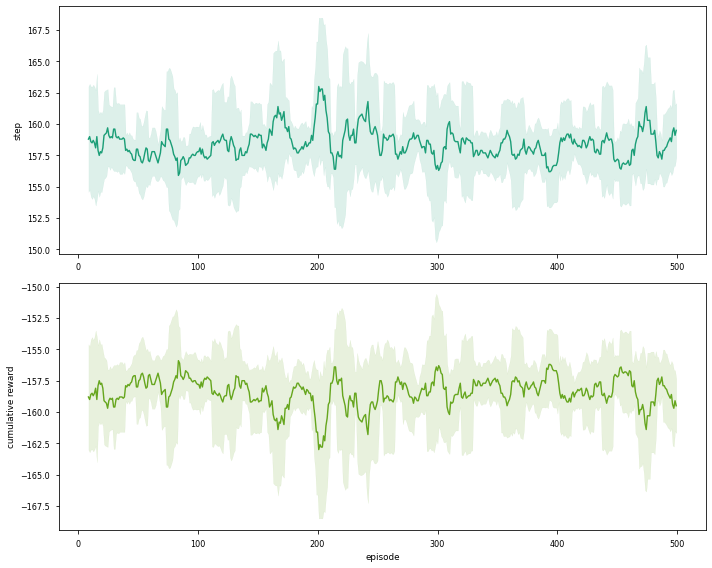

In [46]:
plot_stats(stats_opt, figsize=(10, 8))

In [47]:
class FakeSupport:
    def __init__(self, policy_table):
        self.policy_table = policy_table
        self.epsilon = 0.9
        self.epsilon_decay_rate = 0.0
        self.min_epsilon = 0.01
        self.alpha = 0.0

    def decay_param(self, param):
        decay = getattr(self, param+"_decay_rate", 0)
        value = getattr(self, param, 0)
        min_value = getattr(self, "min_"+param, 0)
        setattr(self, param, max(value-decay, min_value))

    def update(self, *args):
        pass
    
    def policy(self, state, **kwargs):
        return self.policy_table[state]
    